In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_json("News_Category_Dataset_v3.json", lines=True)

In [5]:
data

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [6]:
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [7]:
data.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [8]:
#Add the new column "label_num" which gives a unique number to each of these labels 
target = {'POLITICS':0,
'WELLNESS':1,
'ENTERTAINMENT':2,
'TRAVEL':3,
'STYLE & BEAUTY':4,
'PARENTING':5,
'HEALTHY LIVING':6,
'QUEER VOICES':7,
'FOOD & DRINK':8,
'BUSINESS':9,
'COMEDY':10,
'SPORTS':11,
'BLACK VOICES':12,
'HOME & LIVING':13,
'PARENTS':14,
'THE WORLDPOST':15,
'WEDDINGS':16,
'WOMEN':17,
'CRIME':18,
'IMPACT':19,
'DIVORCE':20,
'WORLD NEWS':21,
'MEDIA':22,
'WEIRD NEWS':23,
'GREEN':24,
'WORLDPOST':25,
'RELIGION':26,
'STYLE':27,
'SCIENCE':28,
'TECH':29,
'TASTE':30,
'MONEY':31,
'ARTS':32,
'ENVIRONMENT':33,
'FIFTY':34,
'GOOD NEWS':35,
'U.S. NEWS':36,
'ARTS & CULTURE':37,
'COLLEGE':38,
'LATINO VOICES':39,      
'CULTURE & ARTS':40,     
'EDUCATION':41}

data["label_num"] = data["category"].map(target)

#check the results with top 5 rows
data.head()

,link,headline,category,short_description,authors,date,label_num
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,36
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,36
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,10
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,5
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,36


In [9]:
df=data[["headline","label_num"]]

In [10]:
df.head()

,headline,label_num
0,Over 4 Million Americans Roll Up Sleeves For O...,36
1,"American Airlines Flyer Charged, Banned For Li...",36
2,23 Of The Funniest Tweets About Cats And Dogs ...,10
3,The Funniest Tweets From Parents This Week (Se...,5
4,Woman Who Called Cops On Black Bird-Watcher Lo...,36


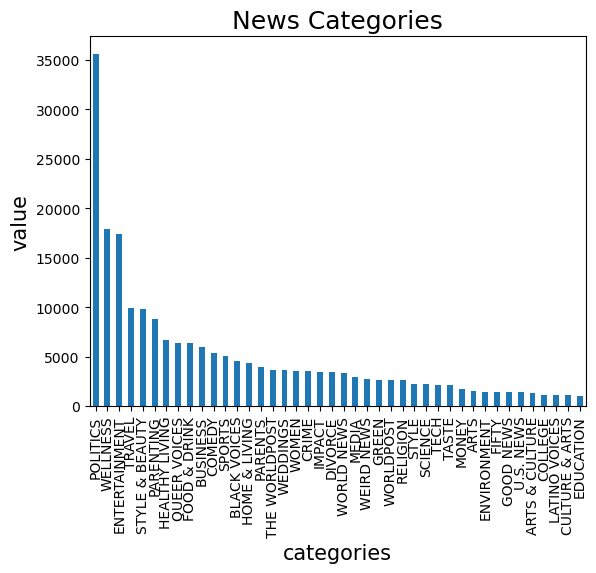

In [11]:
plt.title('News Categories',fontsize='18')
data['category'].value_counts().plot(kind='bar')
plt.xlabel('categories',fontsize=15)
plt.ylabel('value',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [13]:
df = pd.DataFrame(data)

In [14]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
# Initialize the TF-IDF vectorizer to convert text to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

In [16]:
X_train = tfidf_vectorizer.fit_transform(train_df['headline'])
y_train = train_df['category']

In [17]:
# Transform the test data using the same vectorizer
X_test = tfidf_vectorizer.transform(test_df['headline'])
y_test = test_df['category']

In [18]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

In [19]:
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)